<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [2]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


Задание 1
## Простейший kNN
Вам выданы координаты точек и метки классов. Нужно для новой точки предсказать метку класса.

In [3]:
file = open('reds.txt', 'r')
#reds = np.array([])
reds = []
for i in file:
    x = i.split(',')
#    print(x[0],x[1].strip())
    reds.append([x[0],x[1].strip()])
print(reds)

[['0', '3.2417019646041294'], ['1', '6.241626585417948'], ['2', '6.170588428393094'], ['3', '4.413796200854253'], ['4', '1.5534729779086929'], ['5', '3.289094989948577'], ['6', '3.0463661982387995'], ['7', '3.9584788557385084'], ['8', '3.125383907808467'], ['9', '3.9450834328811664'], ['10', '5.844695943507979'], ['11', '3.892689813518732'], ['12', '3.346105401512277'], ['13', '3.179554018322355'], ['14', '2.7300952222963604'], ['15', '4.2420917314977675'], ['16', '5.025907650390986'], ['17', '2.2142571978086916'], ['18', '4.756337785529455'], ['19', '2.3898474615635363'], ['20', '3.132238770289997'], ['21', '4.217915184592404'], ['22', '4.571788659120954'], ['23', '2.5008257231013644'], ['24', '3.4255929452513465'], ['25', '5.015938460341387'], ['26', '4.3909592288614325'], ['27', '4.1443085647942555'], ['28', '4.76945411556588'], ['29', '6.238577861891548'], ['30', '4.4325490553284865'], ['31', '3.8789778018818986'], ['32', '0.8443223476970494'], ['33', '3.8600425101321165'], ['34', 

In [82]:
# выгрузите данные в массивы reds и blues из файлов reds.txt и blues.txt
file = open('reds.txt', 'r')
reds = []
for i in file:
    x = i.split(',')
    reds.append([int(x[0]),float(x[1].strip())])
    
file2 = open('blues.txt', 'r')
blues = []
for i in file2:
    x = i.split(',')
    blues.append([int(x[0]),float(x[1].strip())])

a = [x for x in range(800)]
red_pairs=[[i,reds[i]] for i in range(800)]
blue_pairs=[[i,blues[i]] for i in range(800)]
reds = np.array(reds)[:,1]
blues = np.array(blues)[:,1]
print(blue_pairs)

[[0, [0, -1.7888611899387392]], [1, [1, 1.4643190799656787]], [2, [2, -0.5593097118256213]], [3, [3, -1.1596218994067982]], [4, [4, 1.3832136762322522]], [5, [5, -2.7755782278699397]], [6, [6, -0.23454720537537704]], [7, [7, 1.0476921730841393]], [8, [8, -1.606425460570157]], [9, [9, 2.916638171386177]], [10, [10, 0.47671731289305114]], [11, [11, -1.4665392661286132]], [12, [12, -1.688264714644058]], [13, [13, 1.1261303063086436]], [14, [14, -0.7652650812288008]], [15, [15, 0.5948760781654254]], [16, [16, 0.46123967482902106]], [17, [17, -0.8039840854624368]], [18, [18, -0.280231272908779]], [19, [19, 0.6776282216431917]], [20, [20, -1.2623290666974338]], [21, [21, -0.2933905664715292]], [22, [22, 1.622427736535996]], [23, [23, -0.774243737370734]], [24, [24, -1.9994953355573182]], [25, [25, 0.07248114517755469]], [26, [26, -0.4065305396322482]], [27, [27, -0.9997225413692987]], [28, [28, 0.9828682156087516]], [29, [29, 0.5718394590912945]], [30, [30, -2.100570668851837]], [31, [31, 0.

Постройте на одном графике точки `reds`и `blues` при помощи `plt.scatter`

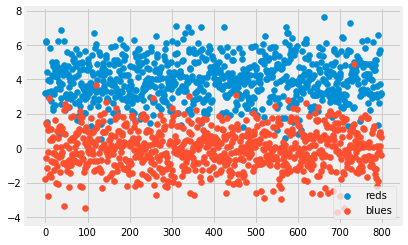

In [83]:
plt.scatter(a, reds, label='reds')
plt.scatter(a, blues, label='blues')
plt.legend()
plt.show()

 Напишем функцию, которая выбирает для заданного **k** и координат точки наиболее подходящий класс по методу k ближайших соседей

[200.0001460495459, 199.02640061790618, 198.0253838046584, 197.0050730811203, 196.00533778554512, 195.00021429709562, 194.0000055407843, 193.00237998977343, 192.0000409404236, 191.00233816028302, 190.0212943199025, 189.0021081763459, 188.00031858736025, 187.00008620224082, 186.0001958294373, 185.0041696607659, 184.0111526560494, 183.00168685493367, 182.00847431484303, 181.00102841177494, 180.00004857525002, 179.0041432967317, 178.00693952649414, 177.0007038826646, 176.00051457127915, 175.01161106588296, 174.00555958812453, 173.00378447332145, 172.00910140997507, 171.03066504743393, 170.00603576578075, 169.00228578920525, 168.0138296276251, 167.0022145754937, 166.0005283037847, 165.00148157257016, 164.00048056095582, 163.04573586894145, 162.0000324928479, 161.0086761614297, 160.00181349182142, 159.0075555850261, 158.00514823086078, 157.0329070273663, 156.00556176816963, 155.01105665393578, 154.00189604662677, 153.0078945415825, 152.0001035080137, 151.00003348508324, 150.00001738825233, 

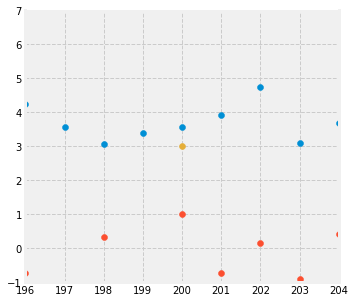

In [80]:
def distance_2d(b,c):
    '''
        Функция подсчета расстояния между двумя точками. Здесь b и с -- координаты точек на плоскости.
    '''
    return ((b[0]-c[0])**2 + (b[1]-c[1])**2)**0.5

b = (200,3)
k=3

def calculate_k_distances(class_points):
    a = []
    for i in class_points:
        a.append(distance_2d(b,i[1]))
    print(a)
    return sorted(a)[:k]


def draw_points(x,y):
    plt.figure(figsize=(5,5))
    plt.grid(ls='--')
    plt.scatter(a,reds)
    plt.scatter(a,blues)
    plt.scatter(x,y)
    plt.xlim(x-4, x+4)
    plt.ylim(y-4, y+4)
draw_points(b[0],b[1])
#print(distance_2d(b=(200,0),c=(5,2)))
b = np.array(calculate_k_distances(red_pairs))
print(b.mean())

In [87]:
def guess_class(x,y,k):
    '''
        Функция отрисовки окрестности точки (x,y) и функция поиска расстояния между точками b,c на плоскости
    '''
    b = (x, y)
    def draw_points(x,y):
        plt.figure(figsize=(5,5))
        plt.grid(ls='--')
        plt.scatter(a,reds,label='reds', color='r')
        plt.scatter(a,blues,label='blues', color='b')
        plt.scatter(x,y)
        plt.xlim(x-4, x+4)
        plt.ylim(y-4, y+4)
    draw_points(x,y)
    
    def distance_2d(b,c):
        #Функция подсчета расстояния между двумя точками. Здесь b и с -- координаты точек на плоскости.
        return ((b[0]-c[0])**2+ (b[1]-c[1])**2)**0.5
        
    def calculate_k_distances(class_points):
        '''
        Функция подсчета расстояния до k ближайших точек класса class_points
        '''
        a = []
        for i in class_points:
            a.append(distance_2d(b, i[1]))
        return sorted(a)[:k]
             
    b = np.array(calculate_k_distances(blue_pairs)) # расстояния до ближайших k соседей класса blue
    r = np.array(calculate_k_distances(red_pairs)) # расстояния до ближайших k соседей класса red

    
     # вам необходимо проверить расстояния до ближайших k точек и посмотреть, какой класс встречается чаще всего. 
    if b.mean() <= r.mean():#Находи среднее значение ближайщих точек и сравниваем.Если среднее значение меньше, то это искомый класс
        print("blues")
    else:
        print("reds")

[200.05732476341998, 199.00592532858954, 198.0319890462768, 197.04390996512942, 196.00666824885505, 195.08551279853214, 194.02696280574978, 193.00987411490388, 192.05525026805122, 191.0000181916077, 190.01675440739183, 189.0527703394369, 188.05844789861098, 187.00938850129674, 186.03810690590225, 185.0156334504719, 184.01751357951954, 183.0395320550248, 182.02955781192176, 181.01489831137354, 180.05045806404607, 179.03029470294496, 178.00533055316367, 177.0402353020044, 176.0709940723067, 175.02448504893636, 174.03334292691574, 173.04623018259582, 172.01182756030354, 171.01723879075007, 170.07649990856453, 169.0118434439983, 168.03613066832372, 167.00935653324052, 166.00879065378413, 165.05854055650954, 164.03356336448564, 163.0257782273506, 162.03653709681066, 161.01035171276285, 160.03268724264507, 159.0138204599502, 158.04725607436117, 157.12933670705675, 156.0019194538359, 155.04846999166043, 154.0151633232809, 153.00059069020102, 152.05146561349005, 151.02662898617837, 150.0014525

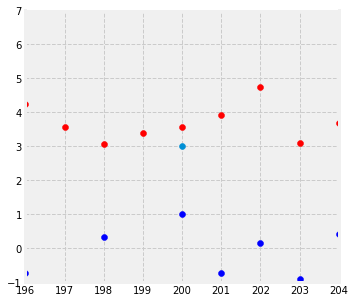

In [90]:
guess_class(200,3,3)